# Tabla de contenidos:

* [Imports and load datas](#Imports-and-load-datas)
* [Visualización de datos y estudio inicial](#Visualización-de-datos-y-estudio-inicial)
    * [Visualización](#Visualización)
* [Un poco más de estudio de los feature](#Un-poco-más-de-estudio-de-los-features)
* [Valores perdidos](#Valores-perdidos)
* [Feature Engineering](#Feature-Engineering)
* [Nos preparamos para el modelado](#Nos-preparamos-para-el-modelado)
* [Modelado](#Modelado)

# Imports and load datas
En primer luegar se importa los módulos que se van a utilizar en este estudio. Los principales son los siguiente:
* pandas
* numpy
* sklearn
* matplotlib
* seaborn

Esta lista de imports debería ir creciendo a medida que se van realizando nuevos análisis y tratamiento de los datos. 

In [211]:
#%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

Luego se cargan los datos de la competencia

In [212]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Visualización de datos y estudio inicial
En esa sección haremos una visualización de los datos con los que contamos. Primero se hace una tabla que muestra los datos que están almacenados en **train**, el tipo de datos, cantidad de columnas, cantidad de datos. 

In [213]:
print('Train Dataset info')
train.head(10)

Train Dataset info


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [214]:
print('La cantidad de columnas en train es: %i y la cantidad de renglones es: %i'\
     %(len(train.columns), len(train.index)))
train.describe()

La cantidad de columnas en train es: 12 y la cantidad de renglones es: 891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [215]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Como puede observarse hay un total de 12 columnas de las cuales 5 son datos categóricos. De los datos numéricos que se pueden ver en la tabla (de descripción) se puede deducir lo siguiente:

* PassengerId: Es el ID. Mucha información de aquí no se puede sacar.
* Survived: De estos datos se pueden observar que sobrevivieron aproximadamente 38% de la muestra.
* Pclass
* Age: Existen 714 datos. Hay 891 - 714 = 177 datos NaN
* SibSp
* Parch 
* Fare: El ticket promedio era de 32.20$(¿?)

En cuanto a los tipos de datos tenemos lo siguiente:
* int64:
    * PassengerID
    * Survived
    * Pclass
    * SibSp
    * Parch
* string:
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked
* float64:
    * Age -> Esto debería ser int64
    * Fare

Paso siguiente veremos los datos faltantes:


In [216]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Como vemos, el dato de Cabin estamos perdiendo aproximadamente el 77%. Me parece que eso no es bueno. En cuanto a edad, tenemos casi el 20% de los datos perdidos, y el 0.22% de datos perdidos de Embarked. 

## Visualización
Lo primero es conocer el porcentaje de sobrevivientes que existen en el DataFrame

In [217]:
total = len(train.index)
sobrev = train[train['Survived'] == 1]
nosobrev = train[train['Survived'] == 0]
s = float(len(sobrev))
ns = float(len(nosobrev))
s_percent = s/total*100.0
sobre_color = 'green'
nosobre_color = 'red'

print('Sobrevivió el %.2f porciento. En el DataFrame hay un total de %i sobrevivientes y un\
 total de %i no sobrevivientes' %(s_percent, s, ns))

Sobrevivió el 38.38 porciento. En el DataFrame hay un total de 342 sobrevivientes y un total de 549 no sobrevivientes


Ahora vamos a estudiar las *features* del DataFrames, haciendo comparativas de si sobrevivió o no. 

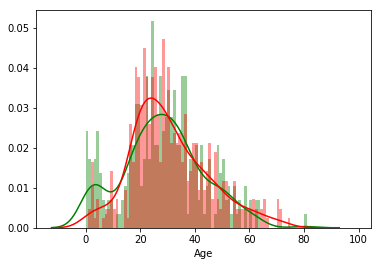

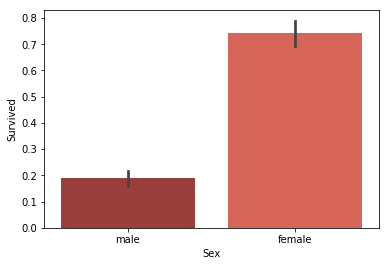

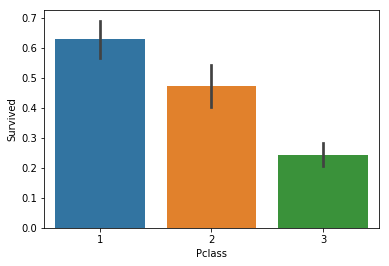

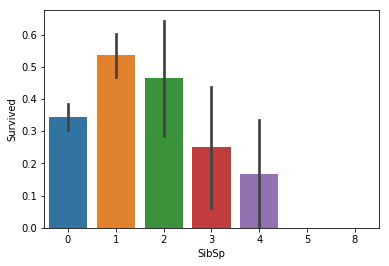

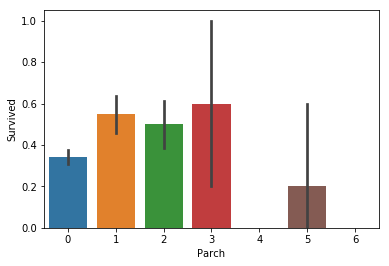

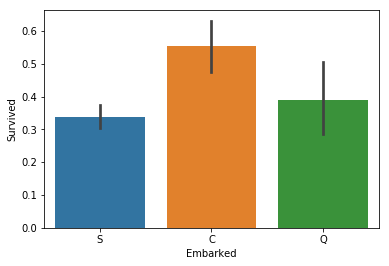

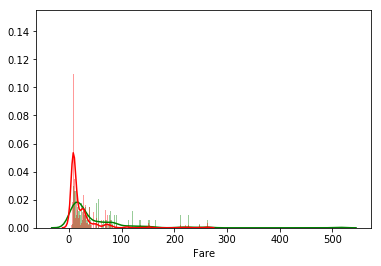

In [218]:
plt.figure()
# Estudio de la edad
sns.distplot(sobrev['Age'].dropna().values, bins=range(0, 100, 1), color=sobre_color, label='Sobrevivio')
sns.distplot(nosobrev['Age'].dropna().values, bins=range(0, 100, 1), color=nosobre_color, axlabel='Age', label='No Sobrevivio')
plt.show()
plt.figure()
# Estudio del sexo
sns.barplot('Sex', 'Survived', data=train, palette='Reds_d')
plt.show()
#Estudio de Pclass
plt.figure()
sns.barplot('Pclass','Survived', data=train)
plt.show()
# SibSp study
plt.figure()
sns.barplot('SibSp', 'Survived', data=train)
plt.show()
# Parch study
plt.figure()
sns.barplot('Parch', 'Survived', data=train)
plt.show()
# Embarked Study
plt.figure()
sns.barplot('Embarked', 'Survived', data=train)
plt.show()
# Fare study
plt.figure()
sns.distplot(sobrev['Fare'].dropna().values, bins=range(0, 513, 1), color=sobre_color, label='Sobrevivio')
sns.distplot(nosobrev['Fare'].dropna().values, bins=range(0, 513, 1), color=nosobre_color, label='No Sobrevivio', axlabel="Fare")
plt.show()

Analizando los gráficos realizados se pueden sacar algunas conclusiones. Por el lado la **edad**, se observa que la mayoría de los que iban en el Titanic eran entre 20 y 40 años. De los cuales podemos decir que, mas o menos entre los 20 y 30 la mayoría no sobrevivió. Mientras que entre los 30 y 40 había una pequeña chance mayor de sobrevivir. También se observa que, lo niños entre 0 y 10 años tenían mejor chance de sobrevivir.   

En el siguiente gráfico, se puede notar que las **mujeres** tenía una mayor chance de sobrevivir. 

Igualmente, se puede observar que las personas que viajaban en **primera clase**, fueron los que más sobrevivieron. Mientras que si viajabas en tercera clase, no tenías muchas chances de sobrevivir. 

En el tercer gráfico, también se puede observar cosas interesantes. Aquellas personas que viabajan con solos o con 1 o 2 hermanos o pareja (**SibSp**) tenían más chance de sobrevivir. A diferencia de aquellos que viabajan con 3 o 4 hermanos o parejas, pero tiene un barra de error bastante grande. Es curioso, como las personas que viajaban solos tenían menos chance de sobrevivir que las que tenían 1 o 2 SibSp. Podría darse la situación que estas personas, viajen en su mayoría en tercera clase, de ahí es su baja chance de sobrevivir en comparación a la categoría de 1 o 2 SibSP.

En el cuarto gráfico, podemos observar que aquellas peronsas que viajaban con 1,2 o 3 padres o hijos (**Parch**), tienen más chances de sobrevivir. Mientras que los que viajaban sin padres o hijos (al igual sin hermanos, es decir solos) tenían menos chances de sobrevivir. Otra cosa a destacar es que tienen bastante error los datos de Parch = 3.

También otra cosa para observar, es que las personas que tienen **Embarqued** = C tienen más chances de sobrevivir.

# Un poco más de estudio de los features
A continuación trabajaremos en la combinación entre los features. Por ejemplo, si el hecho de haber una probabilidad mayor de sobrevivir si eras mujer, se debe a que las mujeres eran jóvenes? o por el hecho de ser mujer? Igualmente sucede con los niños. Otra cosa a investigar es conocer la relación que existe entre las personas que viajaban sin heramano/pareja o hijos/padres, con su clase, o embarque.

Para ver la relación entre las variables podemos llevar a cabo una matriz de correlación de todas las variables numéricas.

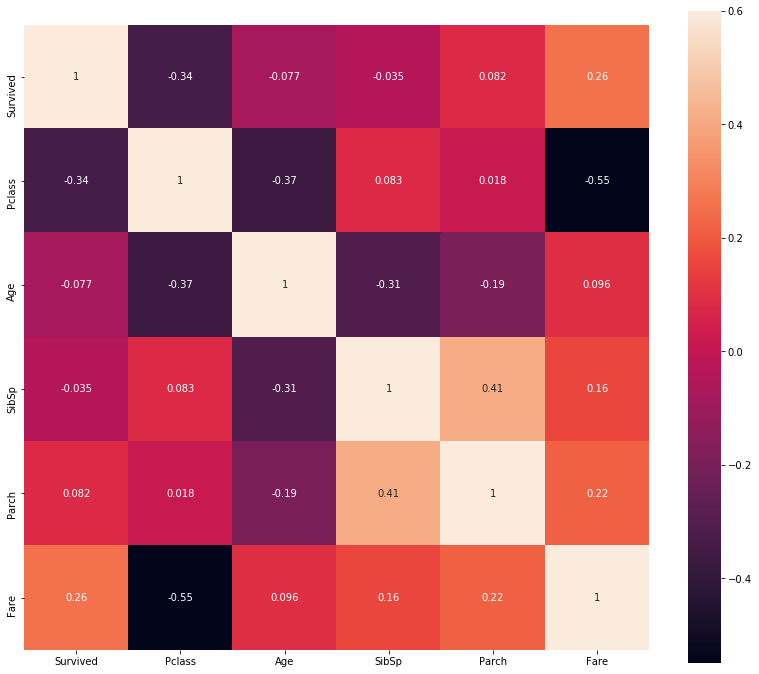

In [219]:
plt.figure(figsize=(14,12))
cm = sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=0.6, square=True, annot=True)
plt.show()

En primer lugar puede observarse que la diagonal es igual a 1. Esto siempre es así, la correlación de una variable consigo misma, siempre es máxima. 

En este mapa de calor podemos observar que aquellas relacione que tiene un color fuerte, es decir aproximados a -6 y 6, tienen mayor correlación. De esta manera, podemos decir que Pclass y Fare, están altamente correlacionados (negativamente). Esto es esperable ya que a medida que se reduce la PClass aumenta su precio. 

Otras dos variables correlacionadas son Parch y SibSp. 

La edad y la PClass, se encuentran correlacionadas negativamente, esto debería explicar que las mientras más grande de edad las personas, se ubicarían en clases más altas.

PClass y la Variable Survived también presentan una correlación interesante. Esto daría indicios de que a mejor clase más posibilidad de sobrevivir había.

Ahora veremos la relación entre la Variable **Sex** y **Age**.

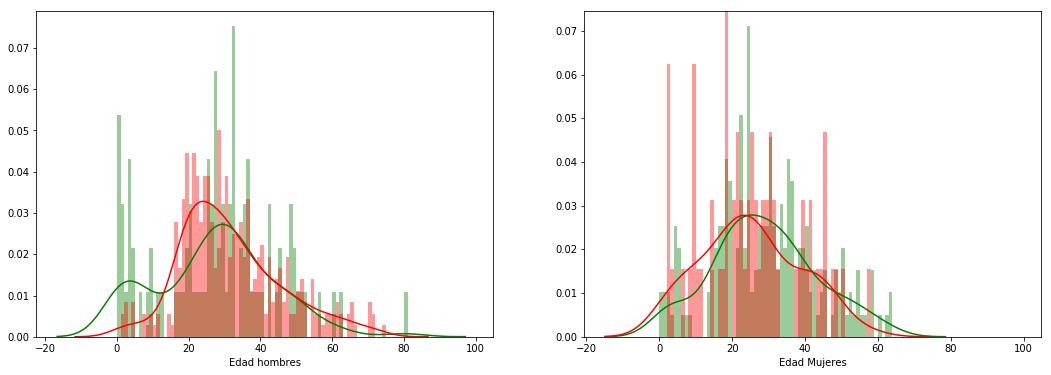

In [220]:
msobre = train[(train['Survived'] == 1) & (train['Sex'] == 'male')]
mNosobre = train[(train['Survived'] == 0) & (train['Sex'] == 'male')]

fsobre = train[(train['Survived'] == 1) & (train['Sex'] == 'female')]
fNosobre = train[(train['Survived'] == 0) & (train['Sex'] == 'female')]

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(msobre['Age'].dropna().values, bins=range(0, 100, 1), color=sobre_color, label='Sobrevivido')
sns.distplot(mNosobre['Age'].dropna().values, bins=range(0, 100, 1), color=nosobre_color, label='No Sobrevivido', 
             axlabel='Edad hombres')

plt.subplot(122)
sns.distplot(fsobre['Age'].dropna().values, bins=range(0, 100, 1), color=sobre_color, label='Sobrevivido')
sns.distplot(fNosobre['Age'].dropna().values, bins=range(0, 100, 1), color=nosobre_color, label='No Sobrevivido',
            axlabel="Edad Mujeres")
plt.show()


Se puede observar que existe una mayor probabilidad de sobrevivir aquellas mujeres entre 20 y 40 años. En cambio para los hombres esto no se cumple. Por otro lado, los niños varones recién nacios y hasta los 10 años aproximadamente tiene más probabilidad de sobrevivir, esto se observa además, con la mujeres mayores de edad. 

Veamos que sucede si hacemos la misma comparación pero con PClass y Survived.

Hombres - Clase - Sobrevivientes
Pclass     1   2    3
Survived             
0         77  91  300
1         45  17   47


Mujeres - Clase - Sobrevivientes
Pclass     1   2   3
Survived            
0          3   6  72
1         91  70  72


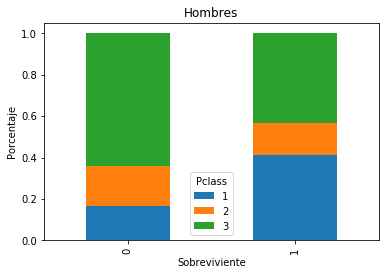

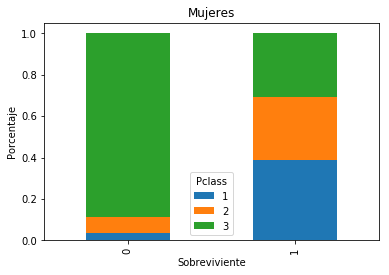

In [221]:
male = train[(train['Sex'] == 'male')]
female = train[(train['Sex'] == 'female')]

tabMale = pd.crosstab(male['Survived'], male['Pclass'])
print('Hombres - Clase - Sobrevivientes')
print(tabMale)

tabFemale = pd.crosstab(female['Survived'], female['Pclass'])
print('\n\nMujeres - Clase - Sobrevivientes')
print(tabFemale)

plt.figure(figsize=(18,6))
plotMale = tabMale.div(tabMale.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Sobreviviente')
plt.ylabel('Porcentaje')
plt.title("Hombres")
plt.show()
plt.figure(figsize=(18,6))
plotFemale = tabFemale.div(tabFemale.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Mujeres")
plt.xlabel('Sobreviviente')
plt.ylabel('Porcentaje')
plt.show()

De estos gráficos se pueden deducir que existe una mayor proporción de hombres que han muerto pertenecientes a la clase 3 en comparación de aquellos que iban en las otras clases. En cambio, para los sobrevivientes (hombres) existe una relación casi idéntica de sobrevivientes de la clase 1 con los de la clase 3. 

Por otro lado, Se puede observar que para el caso de las mujeres, murieron una proporción baja para la clase 1 y 2 (3 y 9 respectivamente). También se puede obervar que tuvieron un mayor cantidad de sobrevivientes en comparación a la de los hombres. En cuanto a la proporción de sobrevivientes mujeres, se puede obervar que son "casi" idénticas. 

Graficos Hombres


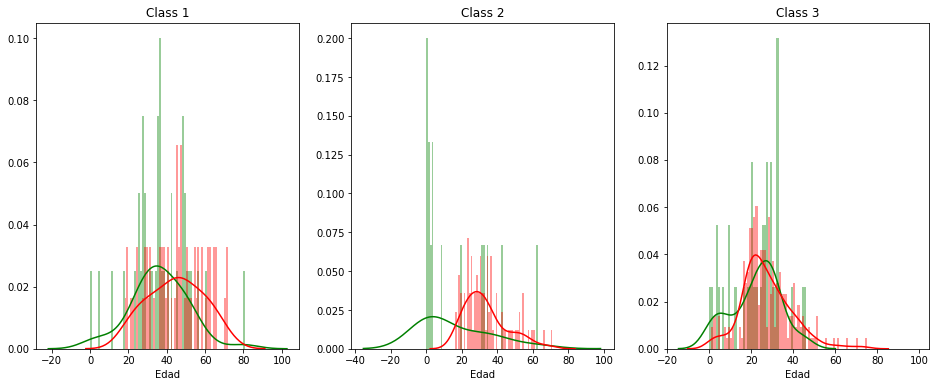

Graficos mujeres


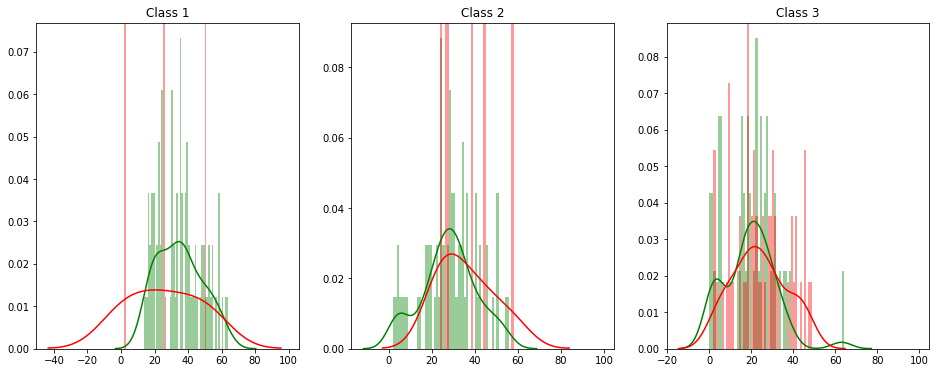

In [222]:
# Class 1 Male
msobreClass1 = train[(train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Pclass'] == 1)]
mnosobreClass1 = train[(train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Pclass'] == 1)]
# Class 2 Male
msobreClass2 = train[(train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Pclass'] == 2)]
mnosobreClass2 = train[(train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Pclass'] == 2)]
# Class 3 Male
msobreClass3 = train[(train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Pclass'] == 3)]
mnosobreClass3 = train[(train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Pclass'] == 3)]

# Class 1 Female
fsobreClass1 = train[(train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Pclass'] == 1)]
fnosobreClass1 = train[(train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Pclass'] == 1)]
# Class 2 Female
fsobreClass2 = train[(train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Pclass'] == 2)]
fnosobreClass2 = train[(train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Pclass'] == 2)]
# Class 3 Female
fsobreClass3 = train[(train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Pclass'] == 3)]
fnosobreClass3 = train[(train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Pclass'] == 3)]

print("Graficos Hombres")
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.distplot(msobreClass1['Age'].dropna().values, bins=range(0,100,1), 
             color=sobre_color, label='Sobreviviente Clase 1')
sns.distplot(mnosobreClass1['Age'].dropna().values, bins=range(0,100,1), 
             color=nosobre_color, label='No sobreviviente Clase 1', axlabel="Edad")
plt.title("Class 1")
plt.subplot(132)
sns.distplot(msobreClass2['Age'].dropna().values, bins=range(0,100,1), 
             color=sobre_color, label='Sobreviviente Clase 2')
sns.distplot(mnosobreClass2['Age'].dropna().values, bins=range(0,100,1), 
             color=nosobre_color, label='No sobreviviente Clase 2', axlabel="Edad")
plt.title("Class 2")
plt.subplot(133)
sns.distplot(msobreClass3['Age'].dropna().values, bins=range(0,100,1), 
             color=sobre_color, label='Sobreviviente Clase 3')
sns.distplot(mnosobreClass3['Age'].dropna().values, bins=range(0,100,1), 
             color=nosobre_color, label='No sobreviviente Clase 3', axlabel="Edad")
plt.title("Class 3")
plt.show()

print("Graficos mujeres")
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.distplot(fsobreClass1['Age'].dropna().values, bins=range(0,100,1), color=sobre_color, label='Sobreviviente Clase 1')
sns.distplot(fnosobreClass1['Age'].dropna().values, bins=range(0,100,1), color=nosobre_color, label='No sobreviviente Clase 1')
plt.title("Class 1")
plt.subplot(132)
sns.distplot(fsobreClass2['Age'].dropna().values, bins=range(0,100,1), color=sobre_color, label='Sobreviviente Clase 2')
sns.distplot(fnosobreClass2['Age'].dropna().values, bins=range(0,100,1), color=nosobre_color, label='No sobreviviente Clase 2')
plt.title("Class 2")
plt.subplot(133)
sns.distplot(fsobreClass3['Age'].dropna().values, bins=range(0,100,1), color=sobre_color, label='Sobreviviente Clase 3')
sns.distplot(fnosobreClass3['Age'].dropna().values, bins=range(0,100,1), color=nosobre_color, label='No sobreviviente Clase 3')
plt.title("Class 3")
plt.show()



En estes gráficos podemos observar el rango de edades en las que los hombres y mujeres tuvieron mayores probabilidad de sobrevivir.

Podemos observar lo siguiente, por el lado de los hombres:
* Pclass1 = Tuvieron más chances de vivir los hombres entre los 20 y 40 años.
* Pclass2 = no tuvieron muchas chances de vivir. Se puede observar que los niños sobrevivieron.
* Pclass3 = No tuvieron muchas chances de vivir. Se puede observar que los niños sobrevivieron.

Por el lado de las mujereS:
* Pclass1 = Tuvieron más probabilidades de sobrevivir las mujeres desde aproximádamente desde los 20 años hasta los 50. 
* Pclass2 = Rondando los 20 años tuvieron levemente más chances de sobrevivir.
* Pclass3 = nuevamente rondando los 20 años tuvieron mejores posibilidades. 

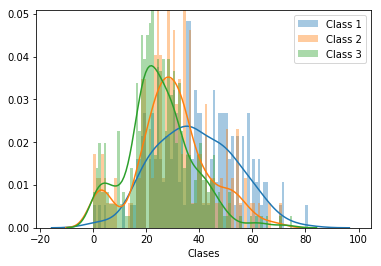

In [223]:
class1 = train[(train['Pclass'] == 1)]
class2 = train[(train['Pclass'] == 2)]
class3 = train[(train['Pclass'] == 3)]

plt.figure()
ax = sns.distplot(class1['Age'].dropna().values, bins=range(0, 100, 1),
                  label="Class 1")
ax.legend(loc="best")
ax = sns.distplot(class2['Age'].dropna().values, bins=range(0, 100, 1),
                  label='Class 2')
ax.legend(loc="best")
ax = sns.distplot(class3['Age'].dropna().values, bins=range(0, 100, 1),
                  label='Class 3', axlabel='Clases')
ax.legend(loc="best")
plt.show()

Del gráfico anterior podemos observar que la clase 3 en su mayoría son personas jóvenes, miestras que la clase 1, si bien cubre el mayor rango de edades, la masa se concentra entre los 30 y 50 años de edad. 

Heads or Tails en [Pytanic](https://www.kaggle.com/headsortails/pytanic) estudia la relación entre Fare y Pclass, que me pareció interesante colocarla aquí.

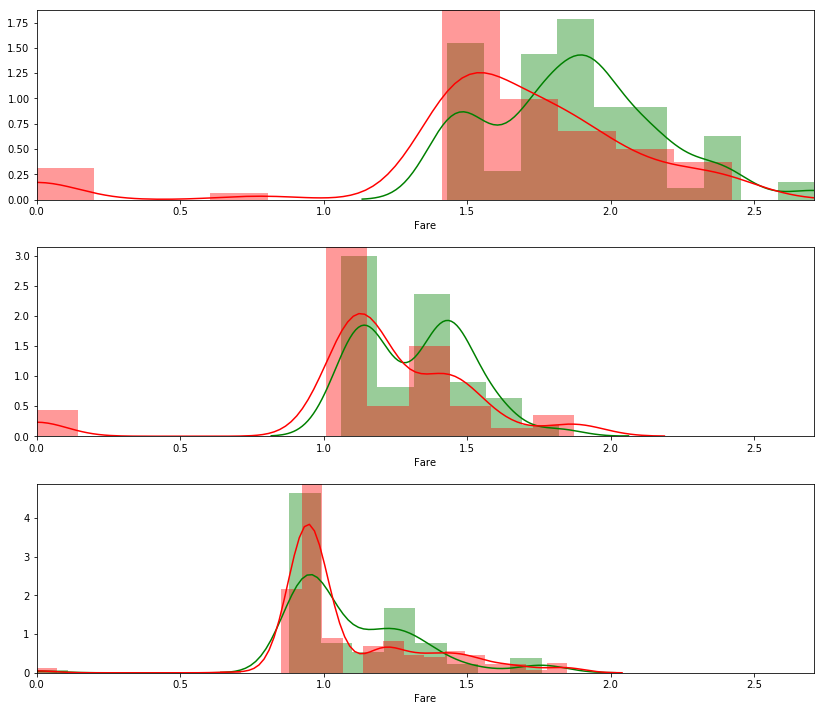

In [224]:
plt.figure(figsize=(12,10))

# Class 1
plt.subplot(311)
ax1 = sns.distplot(np.log10(sobrev['Fare'][sobrev['Pclass'] == 1].dropna().values+1), 
                 color=sobre_color)
ax1 = sns.distplot(np.log10(nosobrev['Fare'][nosobrev['Pclass'] == 1].dropna().values+1),
                  color=nosobre_color, axlabel='Fare')
ax1.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
ax1.legend(loc="best")

# Class 2
plt.subplot(312)
ax2 = sns.distplot(np.log10(sobrev['Fare'][sobrev['Pclass'] == 2].dropna().values+1), 
                 color=sobre_color)
ax2 = sns.distplot(np.log10(nosobrev['Fare'][nosobrev['Pclass'] == 2].dropna().values+1),
                  color=nosobre_color, axlabel='Fare')
ax2.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
ax2.legend(loc="best")

# Class 3
plt.subplot(313)
ax3 = sns.distplot(np.log10(sobrev['Fare'][sobrev['Pclass'] == 3].dropna().values+1), 
                 color=sobre_color)
ax3 = sns.distplot(np.log10(nosobrev['Fare'][nosobrev['Pclass'] == 3].dropna().values+1),
                  color=nosobre_color, axlabel='Fare')
ax3.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
ax3.legend(loc="best")

# Config Plot
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=1, hspace=0.25, wspace=0.35)
plt.show()

De estos gráficos se puede observar que (y es el análisis realizado por **Heads or Tails**) dentro de la primera clase hay dos tipos de grupos, los ricos y los super ricos. 

También se puede observar que dentro de cada clase, hay boletos más caros que otros. EL grupo de los más caros, fueron los que tuvieron más chances de sobrevivir. Es decir, que dentro de tu clase, si pagabas más, podías sobrevivir.

Esto se lo puede ver mejor en los siguientes gráficos. 

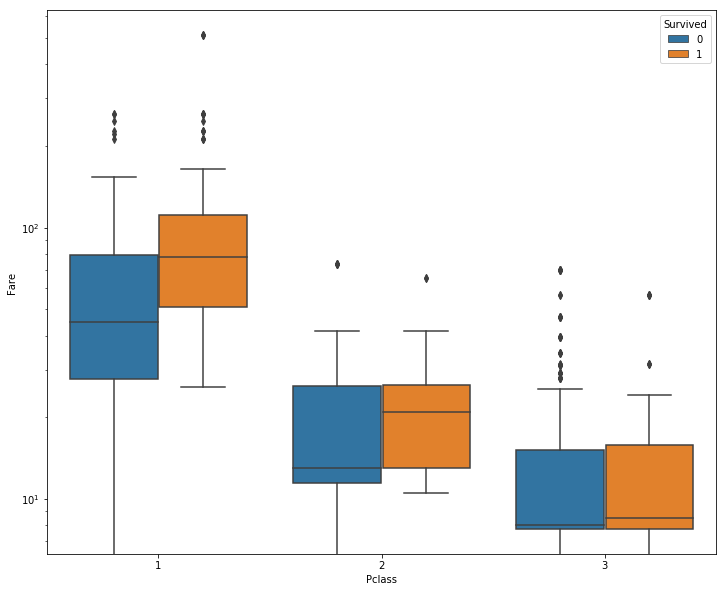

In [225]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train);
ax.set_yscale('log')
plt.show()

# Valores perdidos
Veamos nuevamente la info de los datos que tenemos:

In [226]:
print("Train Dataframe")
print(train.info())
print("Test Dataframe")
print(test.info())

Train Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
Test Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

Podemos observar que hay una gran cantidad de valores perdidos de la variable 'Cabin' (77.10% de valores perdidos). No creo que haya mucho para hacer. 

Por otro lado vemos que hay solo 2 valores perdidos de 'Embarked', veamos cuales son;

In [227]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


Son dos mujeres, una de 38 años y otra de 62 años. Ninguna con familiares. Lo que haremos es decidir que "Embarked" es mejor para estas mujeres.

In [228]:
combine = pd.concat([train, test])

combine.where((combine['Pclass'] < 1.5) &
              (combine['Sex'] == "female") &
              (combine['SibSp'] == 0.0) &
              (combine['Parch'] == 0.0) ).groupby(['Embarked','Pclass','Sex','Parch','SibSp', 'Fare', 'Survived']).size()

Embarked  Pclass  Sex     Parch  SibSp  Fare      Survived
C         1.0     female  0.0    0.0    27.7208   1.0         1
                                        28.7125   0.0         1
                                        31.0000   1.0         1
                                        49.5042   1.0         1
                                        56.9292   1.0         1
                                        69.3000   1.0         2
                                        76.2917   1.0         1
                                        79.2000   1.0         1
                                        83.1583   1.0         1
                                        106.4250  1.0         1
                                        110.8833  1.0         1
                                        134.5000  1.0         1
                                        135.6333  1.0         1
                                        146.5208  1.0         1
                                        227.5

Aquí, simplemente lo que hice fue comparar las mujeres que se parecen a las dos "perdidas". Viendo la variable 'Fare' de este grupo, observamos que hay 1 sola mujer que pagó 83.1583, mientras que hay 3 mujeres que pagaron 86.5. Siendo este grupo dónde yo voy a poner a la dos mujeres.

In [229]:
train['Embarked'].iloc[61] = "S"
train['Embarked'].iloc[829] = "S"

Veremos quien es al que le falta la variable 'Fare' en el dataframe de Test

In [230]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


Lo que haemos será ponerle el promedio de todos los 'Fare' que compartan el mismo Sibsp, Parch, Sex, Embarked, Pclass

In [250]:
combine = pd.concat([train, test])

test['Fare'].iloc[152] = combine['Fare'][(combine['Pclass'] == 3) &
                      (combine['Sex'] == "male") &
                      (combine['SibSp'] == 0.0) &
                      (combine['Parch'] == 0.0) &
                      (combine['Embarked'] == "S")].dropna().median()

print("El valor que se agregó fue: " + str(test['Fare'].iloc[152]))

TypeError: invalid type comparison

# Feature Engineering

Feature engineering es el proceso de usar el dominio del conocimiento de lo datos para crear nuevos feature para ser utilizados en los algoritmos de aprendizaje. Estas variables son fundamentales en la aplicación de machine learning, pero son difíciles y caros de conseguir. 

Lo que buscaríamos en esta sección sería descubrir cuales son las variables que derivan de las variables ya conocidas, que me puedan ayudar a mejorar la clasificación de sobrevividos/no sobrevividos. Por ejemplo, podríamos crear las variables de mujeres ricas y/u hombres pobres. 

En esta sección utilizaré la estrategia de **Heads Or Tails** de listar todas las nuevas features engineering al principio, y luego analizarlas. Si surjen nueva features engineering, se las agrega a la lista inicial y se realiza su análisis. De esta manera se puede ser más organizado en el trabajo. Se trabajará con la combinación de datos train y test, para asegurarnos de utilizar todos la información que tenemos y luego separamos los dos dataframes.

In [252]:
# Defininf combine
combine = pd.concat([train.drop('Survived', 1), test])
survived = train['Survived']

# creating feature eng
combine['Child'] = combine['Age'] <= 12
combine['Age_know'] = combine["Age"].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone']  =  (combine['SibSp'] + combine['Parch']) == 0
combine['Title'] = combine['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]
combine['Young'] = (combine['Age'] <= 30) & (combine['Age'] >= 12)
combine['Old'] = combine['Age'] >= 60

# come back to train and test data
train = combine.iloc[:len(train)]
test = combine.iloc[len(test):]

# add survived again
train['Survived'] = survived

# update sobrev and nosobrev
sobrev = train[train['Survived'] == 1]
nosobrev = train[train['Survived'] == 0]

## Niños
Se estudiará la posibilidad de sobrevivir de los niños.


Niños vs Clases
Pclass    1    2    3
Child                
False   212  167  443
True      4   17   48

Niños vs Sexo
Sex    female  male
Child              
False     282   540
True       32    37

Niños vs Sobrevivientes
Survived    0    1
Child             
False     520  302
True       29   40


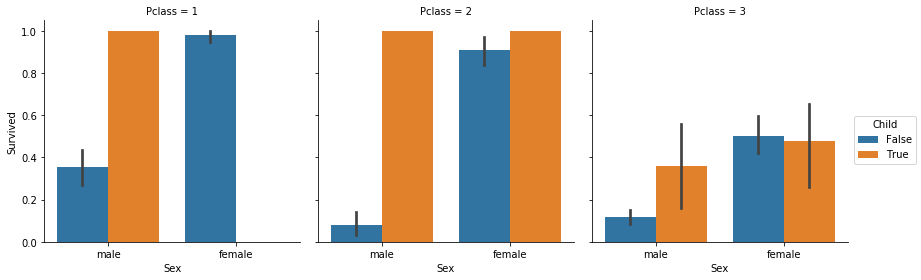

In [233]:
tab = pd.crosstab(train['Child'], train['Pclass'])
print("\nNiños vs Clases")
print(tab)
tab = pd.crosstab(train['Child'], train['Sex'])
print("\nNiños vs Sexo")
print(tab)
tab = pd.crosstab(train['Child'], train['Survived'])
print("\nNiños vs Sobrevivientes")
print(tab)
plt.figure()
sns.factorplot(x="Sex", y="Survived", hue="Child", col='Pclass',
              data=train, kind='bar')
plt.show()

De los estudiado podemos obervar que iban muy pocos niños en la clase 1, de los cuales aparentemente sobrevivieron todos. Por el lado de la clase 2 y 3, vemos una mayor cantidad de niños y niña, de los cuales tiene un gran porcentaje de superviviencias. Se puede decir que lo niños de la clase 2 y 3 tenían más chances de sobrevivir. 

Otro dato interesante es que hay "casi" la misma cantidad de niños que niñas. Pero, las niñas tenían una chance mayor (no mucha) de sobrevivir.

## Edad conocida
Estudiamos la variable: 'Age_know'


Edad conocida vs Sobrevivientes
Survived    0    1
Age_know          
False     125   52
True      424  290


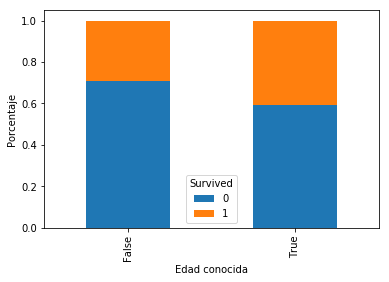


Edad conocida vs Class
Pclass      1    2    3
Age_know               
False      30   11  136
True      186  173  355


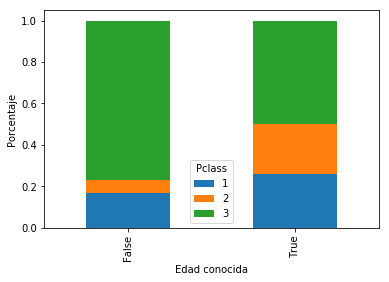


Edad conocida vs Sexo
Sex       female  male
Age_know              
False         53   124
True         261   453


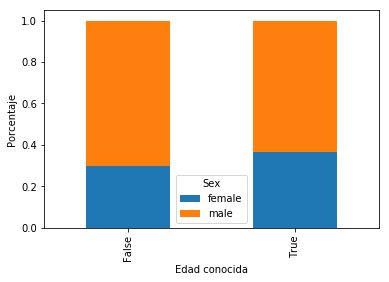

In [234]:
tab = pd.crosstab(train['Age_know'], train['Survived'])
print("\nEdad conocida vs Sobrevivientes")
print(tab)
plt.figure()
buff = tab.div(tab.sum(1).astype('float'), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Edad conocida')
plt.ylabel('Porcentaje')
plt.show()

tab = pd.crosstab(train['Age_know'], train['Pclass'])
print("\nEdad conocida vs Class")
print(tab)
plt.figure()
buff = tab.div(tab.sum(1).astype('float'), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Edad conocida')
plt.ylabel('Porcentaje')
plt.show()

tab = pd.crosstab(train['Age_know'], train['Sex'])
print("\nEdad conocida vs Sexo")
print(tab)
plt.figure()
buff = tab.div(tab.sum(1).astype('float'), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Edad conocida')
plt.ylabel('Porcentaje')
plt.show()


Del primer gráfico se puede concluir que existe una mayor probabilidad de que si alguien sobrevive, se le conozca la edad (un 40%). En contrapartida, si una persona no se le conoce la edad tiene una chance de sobrevivir de unos 30%. 

Del segundo gráfico se puede observar que que si no se conocía la edad es muy probable que seas de la clase 3. Igualmente, por la diferencia en cantidades de personas que iban en las diferentes clases, este estudio puede distorcionar los resultados. 

Del último gráfico se puede observar que había más chances de que si se conocía la edad de alguien sea de un hombre. Pero esto puede estar influenciado por la cantidad de hombres. 

## Familia
Otra variable que resulta interesante estudiar es la 'familia'


Tamaño de la familia vs Sobrevivientes
Survived    0    1
Family            
0         374  163
1          72   89
2          43   59
3           8   21
4          12    3
5          19    3
6           8    4
7           6    0
10          7    0


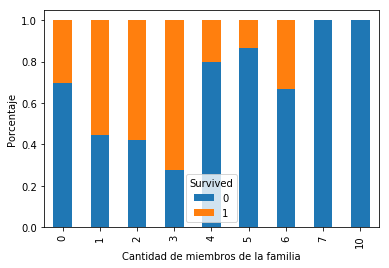

In [235]:
tab = pd.crosstab(train['Family'], train['Survived'])
print("\nTamaño de la familia vs Sobrevivientes")
print(tab)
plt.figure(figsize=(18,14))
buff = tab.div(tab.sum(1).astype('float'), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Cantidad de miembros de la familia')
plt.ylabel('Porcentaje')
plt.show()

Aquí se puede observar lo que veníamos estudiando anteriormente, existe una mayor probabilidad de sobrevivir si había personas que viajaban con varios familiares. Aquí observarmos que lo ideal es viajar con 1, 2 hasta 3 familiares más. 

## Viajantes solitarios
En esta sección estudiaremos los viajantes solitarios. 


Viajantes solitarios vs Sobrevivientes
Survived    0    1
Alone             
False     175  179
True      374  163


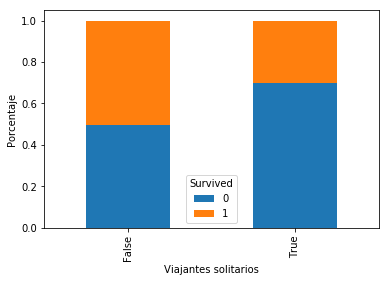

In [236]:
tab = pd.crosstab(train['Alone'], train['Survived'])
print("\nViajantes solitarios vs Sobrevivientes")
print(tab)
plt.figure(figsize=(18,14))
buff = tab.div(tab.sum(1).astype('float'), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Viajantes solitarios')
plt.ylabel('Porcentaje')
plt.show()

Se puede observar, como vimos anteriormente, que si se viajaba solo tenía menos chances de sobrevivir. Vemos los que viajaron solo sobrevivieron el 30.35%. Mientras que los que no viajaron solos sobrevivieron el 50%.

In [237]:
stats.binom_test(x=374,n=163+374,p=175/(175.+179.))

3.2868198626904137e-21

## Título

Siguiendo los pasos de [heardsortail](https://www.kaggle.com/headsortails/pytanic) (si, llegúe a la sección de [Modelado](#Modelado) y me di cuenta que mis modelos no son tan buenos), vamos vemo que podemos aprender del título de las personas.

El título se encuentra dentro de la variable Name:

In [238]:
train.loc[:,['Name', 'Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


In [239]:
train.loc[:,['Name', 'Age', 'Title']].head(10)

,Name,Age,Title
0,"Braund, Mr. Owen Harris",22.0,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs
2,"Heikkinen, Miss. Laina",26.0,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs
4,"Allen, Mr. William Henry",35.0,Mr
5,"Moran, Mr. James",NaN,Mr
6,"McCarthy, Mr. Timothy J",54.0,Mr
7,"Palsson, Master. Gosta Leonard",2.0,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs


Ahora hay que buscar patrones en los títulos para ello veremos cuales son los diferente títulos y cuantos con ese títulos hay. Además buscaremos un promedio de la edad de ese titulo.

In [240]:
print(combine['Age'].groupby(combine['Title']).count())
print(combine['Age'].groupby(combine['Title']).mean())

Title
Capt          1
Col           4
Don           1
Dona          1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       53
Miss        210
Mlle          2
Mme           1
Mr          581
Mrs         170
Ms            1
Rev           8
Sir           1
th            1
Name: Age, dtype: int64
Title
Capt        70.000000
Col         54.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
th          33.000000
Name: Age, dtype: float64


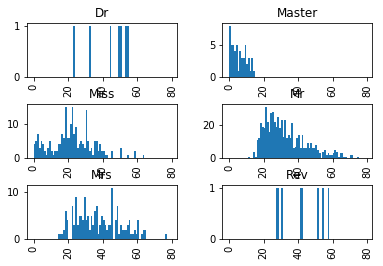

count    170.000000
mean      36.994118
std       12.901767
min       14.000000
25%       27.000000
50%       35.500000
75%       46.500000
max       76.000000
Name: Age, dtype: float64


In [241]:
plt.figure(figsize=[12,10])
title = combine[combine['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'])]
foo = title['Age'].hist(by=title['Title'], bins=np.arange(0,80,1))
plt.show()

print(combine[combine['Title'].isin(["Mrs"])]['Age'].describe())

Como podemos observar los títulos de Rev. y Dr. lo tienen muy pocas personas, por lo tanto no nos aportaría mucha información. Por otro lado podemos observar que:

_Master_: Lo tiene los de menos de 15 años. Y son todos hombres. Los _Mr_ son los mayores de 15 años enm su mayoría. 

_Miss_: En este caso tenemos que son mujeres, niñas hasta mayores en menor medida. Y por el lado de _Mrs_ se tiene que son mujeres, en un rango un poco más acotado, entre 14 y 76. Se observa que hay una superposición entre los 14 y 30 años.


En nuestro estudio vamos a dividir en Jovenes (Young, para seguir con el utilizado en [Pytanic](https://www.kaggle.com/headsortails/pytanic) que serán los menores de 25 años y adultos (Old) mayores de 60 años. 

Young
Young     False  True 
Survived              
0           335    214
1           215    127


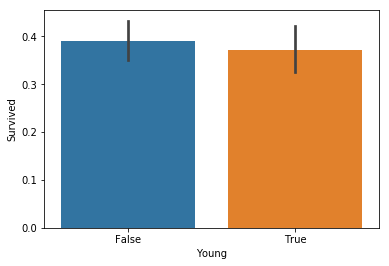

Old
Old       False  True 
Survived              
0           530     19
1           335      7


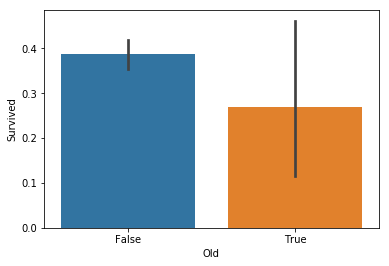

In [257]:
print("Young")
tab =  pd.crosstab(train['Survived'], train['Young'])
print(tab)
sns.barplot('Young', 'Survived', data=train)
plt.show()
print("Old")
tab =  pd.crosstab(train['Survived'], train['Old'])
print(tab)
sns.barplot('Old', 'Survived', data=train)
plt.show()

# Nos preparamos para el modelado

Lo que haremos aqui será llevar todos los string a enteros, para que de esta manera poder aplicar los modelos. Lo haremos tal como se hace en [Pytanic](https://www.kaggle.com/headsortails/pytanic).

In [243]:
combine = pd.concat([train.drop('Survived',1), test])
survived = train['Survived']

combine['Sex'] = combine['Sex'].astype('category')
combine['Sex'].cat.categories = [0,1]
combine['Sex'] = combine['Sex'].astype('int')

combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")

test = combine.iloc[len(test):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

# Modelado

## Regresión logística


In [261]:
training, testing = train_test_split(train, test_size=0.2, random_state=0)

In [262]:
cols = ['Sex', 'Pclass', 'Child', 'Alone', 'Family', 'Age_know', 'Young', 'Old']
tcols = np.append(['Survived'], cols)

df = training.loc[:,tcols].dropna()
X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

In [263]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(X,y)
score_log = cross_val_score(clf_log, X, y, cv=5).mean()
print(score_log)

0.809068136937


## Perceptrón

In [264]:
clf_pctr = Perceptron(
    class_weight='balanced'
    )
clf_pctr = clf_pctr.fit(X,y)
score_pctr = cross_val_score(clf_pctr, X, y, cv=5).mean()
print(score_pctr)

0.775333566643
